In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import plotly.express as px
from shapely.geometry import Point
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF


In [247]:
dataOrg = pd.read_csv("data/query_Philippines.csv")

In [248]:
dataOrg

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2009-01-01T12:36:55.740Z,9.4300,124.1510,525.300,4.5,mb,53.0,80.3,NaN,0.90,...,2014-11-07T01:38:07.352Z,"20 km SSW of Valencia, Philippines",earthquake,NaN,5.700,NaN,14.0,reviewed,us,us
1,2009-01-02T05:16:44.020Z,7.9510,126.3660,98.400,4.1,mb,13.0,110.5,NaN,0.76,...,2014-11-07T01:38:07.757Z,"8 km N of Boston, Philippines",earthquake,NaN,17.500,NaN,2.0,reviewed,us,us
2,2009-01-03T16:53:11.000Z,6.6520,123.5750,615.100,4.5,mb,51.0,74.0,NaN,0.86,...,2014-11-07T01:38:09.120Z,"51 km W of Taguisa, Philippines",earthquake,NaN,6.200,NaN,17.0,reviewed,us,us
3,2009-01-04T02:19:32.850Z,4.9830,127.4040,83.800,4.6,mb,39.0,63.1,NaN,0.79,...,2014-11-07T01:38:09.798Z,"204 km SE of Pondaguitan, Philippines",earthquake,NaN,10.600,NaN,11.0,reviewed,us,us
4,2009-01-05T08:23:42.220Z,8.0990,121.4440,35.000,4.5,mb,26.0,78.2,NaN,1.14,...,2014-11-07T01:38:10.283Z,"87 km WNW of Siocon, Philippines",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,2024-09-22T07:31:31.184Z,13.9305,120.7585,219.461,4.1,mb,47.0,111.0,8.302,0.95,...,2024-09-28T06:17:00.040Z,"2 km ESE of Balayan, Philippines",earthquake,12.00,8.530,0.097,29.0,reviewed,us,us
9111,2024-09-22T08:22:45.914Z,5.7247,126.9841,133.140,4.4,mb,34.0,115.0,1.933,0.58,...,2024-09-22T08:44:38.040Z,"113 km SE of Pondaguitan, Philippines",earthquake,8.10,6.984,0.105,26.0,reviewed,us,us
9112,2024-09-23T23:41:10.246Z,19.6376,120.5083,15.995,4.5,mb,41.0,114.0,3.209,0.69,...,2024-09-23T23:57:11.040Z,"122 km NNW of Pagudpud, Philippines",earthquake,8.26,3.026,0.100,29.0,reviewed,us,us
9113,2024-09-26T23:27:42.918Z,8.2553,127.3199,10.000,4.7,mb,56.0,109.0,2.089,0.84,...,2024-09-26T23:44:41.040Z,"98 km E of Barcelona, Philippines",earthquake,8.78,1.874,0.065,73.0,reviewed,us,us


In [249]:
dataOrg['DateTime'] = pd.to_datetime(dataOrg['time'])
data = dataOrg.sort_values(by='DateTime')
selection2 = data['place'].str.contains('Philippines', case=True)
data = data[selection2]

In [250]:
data_rest = data[['DateTime','latitude','longitude','mag']].set_index('DateTime')

In [251]:
data_rest.head()

,latitude,longitude,mag
DateTime,,,
2009-01-01 12:36:55.740000+00:00,9.430,124.151,4.5
2009-01-02 05:16:44.020000+00:00,7.951,126.366,4.1
2009-01-03 16:53:11+00:00,6.652,123.575,4.5
2009-01-04 02:19:32.850000+00:00,4.983,127.404,4.6
2009-01-05 08:23:42.220000+00:00,8.099,121.444,4.5


In [252]:
high_mag_data = data_rest[data_rest['mag']>=5]
low_mag_data = data_rest[data_rest['mag']<5]

In [253]:
full_daily_counts = low_mag_data.resample('D').size()
full_weekly_counts = low_mag_data.resample('W').size()

low_daily_counts = low_mag_data.resample('D').size()
low_weekly_counts = low_mag_data.resample('W').size()

high_daily_counts = high_mag_data.resample('D').size()
high_weekly_counts = high_mag_data.resample('W').size()


Text(0, 0.5, 'Counts')

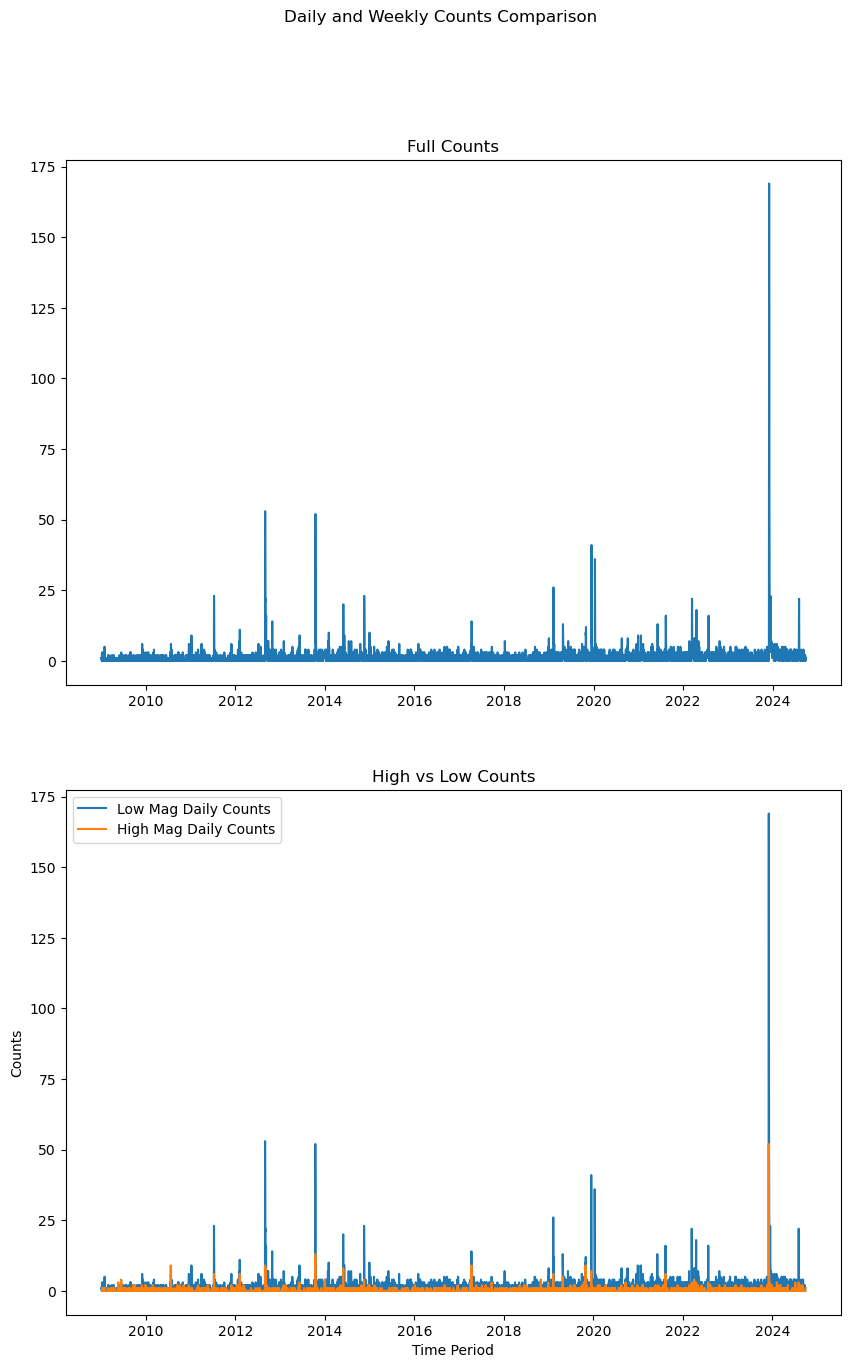

In [254]:
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

axs[0].plot(full_daily_counts, label="Full Daily Counts")
axs[0].set_title("Full Counts")

axs[1].plot(low_daily_counts, label="Low Mag Daily Counts")
axs[1].set_title("High vs Low Counts")

axs[1].plot(high_daily_counts, label="High Mag Daily Counts")
axs[1].legend()
fig.suptitle('Daily and Weekly Counts Comparison')
plt.xlabel('Time Period')
plt.ylabel('Counts')

C:\Users\20204147\AppData\Local\Temp\ipykernel_6972\1456935107.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

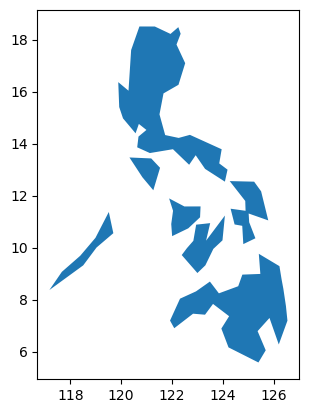

In [255]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

philippines_map = worldmap[worldmap['name'] == 'Philippines']

philippines_map.plot()


<Axes: >

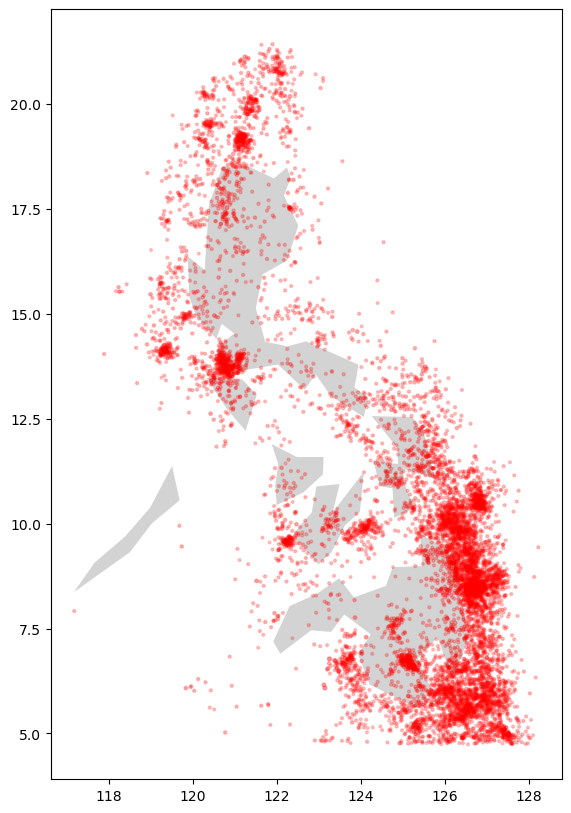

In [256]:
fig, ax = plt.subplots(figsize=(10, 10))

data_rest['geometry'] = data_rest.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
data_rest = gpd.GeoDataFrame(data_rest, geometry='geometry')


philippines_map.plot(ax=ax, color='lightgray')  
data_rest.plot(ax=ax, color='red', markersize=data_rest['mag'], alpha=0.05*data_rest['mag'], label='Earthquakes') 




In [257]:
tectonic_plates = pd.read_csv("data/all.csv" )
#https://www.kaggle.com/datasets/cwthompson/tectonic-plate-boundaries?resource=download
tectonic_plates

tectonic_lines = tectonic_plates.groupby('plate').apply(
    lambda group: LineString(zip(group['lon'], group['lat']))
)

tectonic_gdf = gpd.GeoDataFrame(tectonic_lines, columns=['geometry'], geometry='geometry')


c:\Users\20204147\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:2195: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




<Axes: >

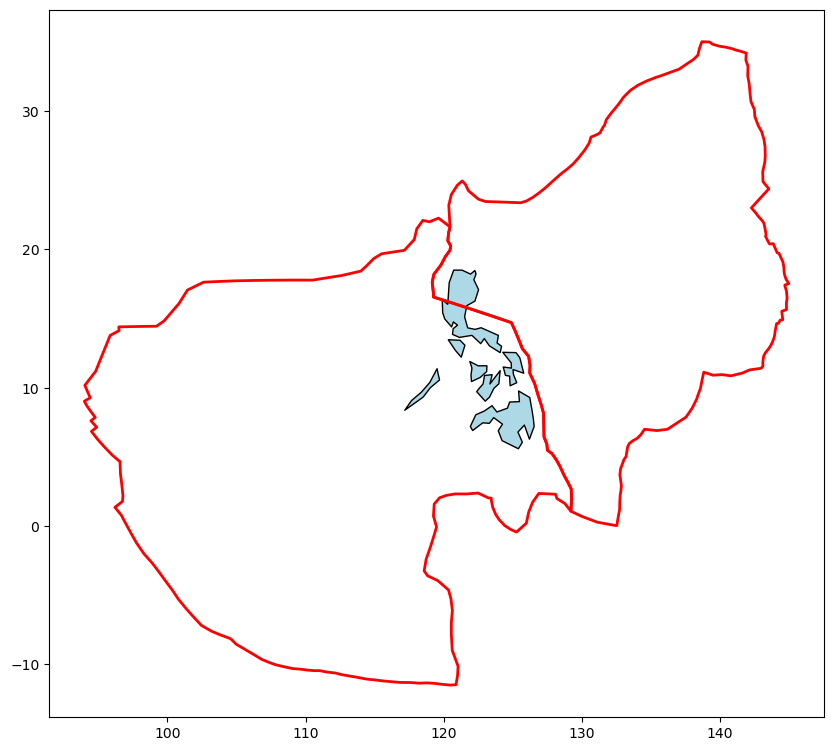

In [258]:
fig, ax = plt.subplots(figsize=(10, 10))


tectonic_gdf_clipped = tectonic_gdf.sjoin(philippines_map)
philippines_map.plot(ax=ax, color='lightblue', edgecolor='black')

tectonic_gdf_clipped.plot(ax=ax, color='red', linewidth=2)


In [259]:
#low_weekly_counts,high_weekly_counts
df = pd.DataFrame({
    'low_mag': low_weekly_counts,
    'high_mag': high_weekly_counts
}).fillna(0)
df.reset_index(inplace=True)

df['Year'] = df['DateTime'].dt.year

In [260]:
df_melted = df.melt(id_vars='DateTime', value_vars=['low_mag', 'high_mag'], 
                    var_name='Magnitude_Type', value_name='Count')


In [261]:
df

,DateTime,low_mag,high_mag,Year
0,2009-01-04 00:00:00+00:00,4,0.0,2009
1,2009-01-11 00:00:00+00:00,7,2.0,2009
2,2009-01-18 00:00:00+00:00,6,2.0,2009
3,2009-01-25 00:00:00+00:00,7,3.0,2009
4,2009-02-01 00:00:00+00:00,14,2.0,2009
...,...,...,...,...
817,2024-09-01 00:00:00+00:00,8,2.0,2024
818,2024-09-08 00:00:00+00:00,7,2.0,2024
819,2024-09-15 00:00:00+00:00,6,0.0,2024
820,2024-09-22 00:00:00+00:00,5,0.0,2024


In [262]:
df_melted['Year'] = df_melted['DateTime'].dt.year

fig = px.line(df_melted, x='DateTime', y='Count',
              color='Magnitude_Type', 
              title='Number of low and high magnitude earthquakes over time per week',
              line_shape='linear')


fig.update_layout(yaxis_title='Count', xaxis_title='Date', showlegend=True)

fig.show()

c:\Users\20204147\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Question 2 EDA

In [263]:
data_rest.reset_index(inplace=True)
data_rest['time_diff'] = data_rest['DateTime'].diff()
data_rest

# Drop the first row, as it will be a NaN value (first time how no time to subtract from)
data_rest = data_rest[['time_diff']].drop(index=0)
# Convert the time differences to seconds
data_rest['time_diff_seconds'] = pd.to_timedelta(data_rest['time_diff']).dt.total_seconds()


In [264]:
time_diff_data = data_rest['time_diff_seconds'].copy()



# Fitting distributions
# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and béta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)

# Add theoretical density
xs = np.arange(np.min(time_diff_data), np.max(time_diff_data))
print(xs)

# Show a plot with the histogram of the time difference data, and the estimated distributions


# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)
print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))

First moment: 55302.17058388067, Second moment: 9283405845.291119
Normal distribution: 55302.17058388067, 6225075774.002482
Exponential distribution: 1.8082472883830666e-05
Gamma distribution: 0.49129202315271553, 8.883774686701286e-06
[7.56800000e+00 8.56800000e+00 9.56800000e+00 ... 8.22269568e+05
 8.22270568e+05 8.22271568e+05]
KS Test Exponential distribution: KstestResult(statistic=0.19238133359063608, pvalue=1.1284120277548006e-291, statistic_location=7131.61, statistic_sign=1)
KS Test Normal distribution: KstestResult(statistic=0.24170569701186878, pvalue=0.0, statistic_location=7.568, statistic_sign=-1)
KS Test Gamma distribution: KstestResult(statistic=0.041712092653851646, pvalue=5.1098618073864935e-14, statistic_location=1865.36, statistic_sign=1)


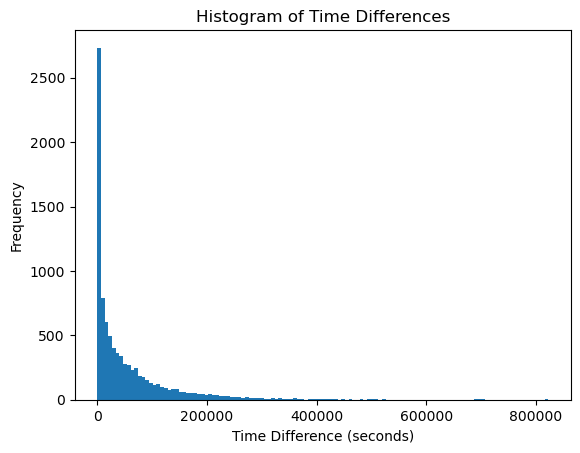

Mean: 55302.17058388067, Variance: 6225768835.210889
KstestResult(statistic=0.19238133359063608, pvalue=1.1284120277548006e-291, statistic_location=7131.61, statistic_sign=1) KstestResult(statistic=0.17881357073876947, pvalue=9.352110007163834e-252, statistic_location=37616.07, statistic_sign=-1)


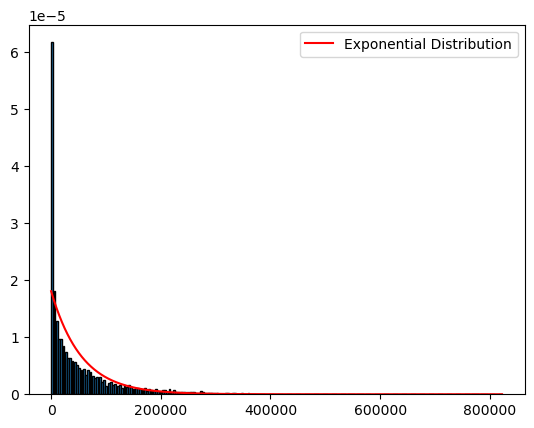

In [265]:
from statsmodels.graphics.tsaplots import plot_acf

plt.hist(time_diff_data, bins='auto')
plt.title('Histogram of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

M1 = time_diff_data.mean()
M2 = (time_diff_data**2).mean()
variance_time_diff = time_diff_data.var()
print(f'Mean: {M1}, Variance: {variance_time_diff}')
alphaEst = (M1 ** 2 / (M2 - M1 ** 2))

lamEst = 1/(M1)
betaEst = 1/(M1)
estExpDist = stats.expon(scale=1 / lamEst)
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)



test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)

test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
print(test_exponential,test_gamma)


plt.figure()
plt.hist(time_diff_data, bins=200, rwidth=0.8, edgecolor='black', density=True)
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
#plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.legend()
plt.show()

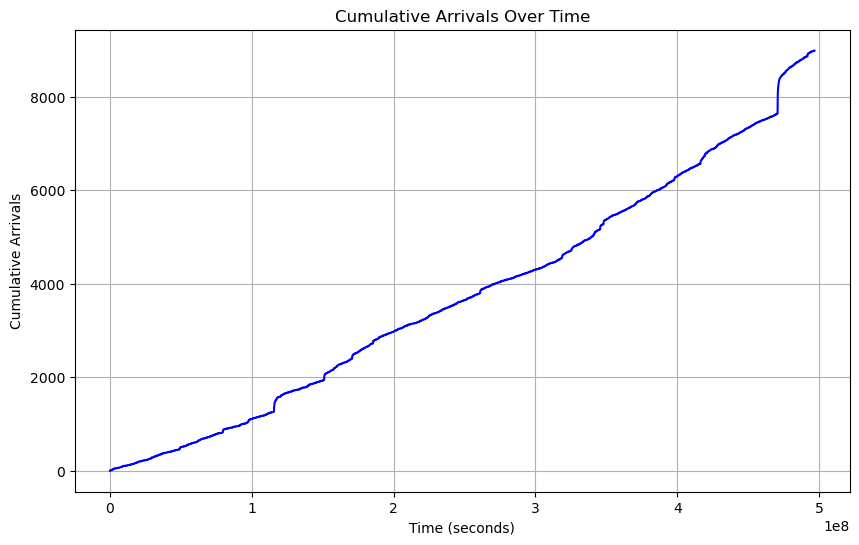

In [266]:

# Calculate arrival times from time differences
arrival_times = time_diff_data.cumsum()

# Create cumulative counts
arrivals = np.arange(0, len(arrival_times) + 1)

# Add point at t=0
arrival_times = np.append([0], arrival_times)

# Create the plot
plt.figure(figsize=(10, 6))
plt.step(arrival_times, arrivals, 'b', where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Arrivals')
plt.title('Cumulative Arrivals Over Time')
plt.grid(True)
plt.show()


Question 3

In [267]:
Q3data = data.copy()


In [268]:
high_mag_data_Q3 = Q3data[Q3data['mag']>=5]
low_mag_data_Q3 = Q3data[Q3data['mag']<5]

high_mag_data_Q3['timediff']  = high_mag_data_Q3['DateTime'].diff()
high_mag_data_Q3  = high_mag_data_Q3.drop(index=10)
low_mag_data_Q3['timediff']  = low_mag_data_Q3['DateTime'].diff()
low_mag_data_Q3 = low_mag_data_Q3.drop(index=0)

C:\Users\20204147\AppData\Local\Temp\ipykernel_6972\3122762967.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\20204147\AppData\Local\Temp\ipykernel_6972\3122762967.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



First moment: 62921.926910542315, Second moment: 11592864031.246643
Normal distribution: 62921.926910542315, 7633695145.111013
Exponential distribution: 1.589271100075694e-05
Gamma distribution: 0.5186438298719949, 8.242656500481363e-06
Uniform distribution: a=8.14, b=902051.68


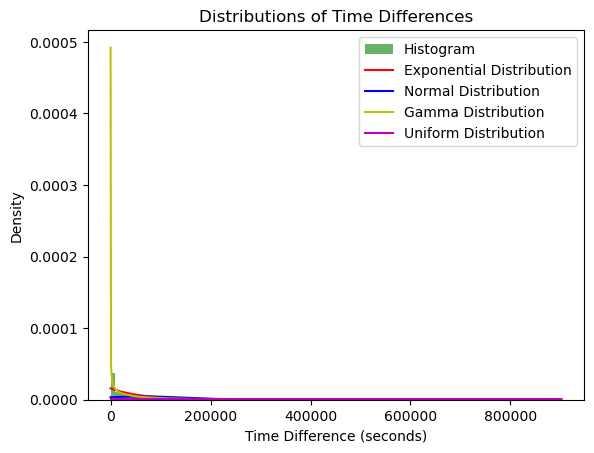

KS Test Exponential distribution: KstestResult(statistic=0.17614320728879612, pvalue=1.2056579835400521e-214, statistic_location=8305.339, statistic_sign=1)
KS Test Normal distribution: KstestResult(statistic=0.23573905847571475, pvalue=0.0, statistic_location=8.14, statistic_sign=-1)
KS Test Gamma distribution: KstestResult(statistic=0.03682981941396957, pvalue=9.763003699836303e-10, statistic_location=1865.36, statistic_sign=1)
KS Test Uniform distribution: KstestResult(statistic=0.7117770475648302, pvalue=0.0, statistic_location=157700.66, statistic_sign=1)


In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert the time differences to seconds
low_mag_data_Q3['time_diff_seconds'] = pd.to_timedelta(low_mag_data_Q3['timediff']).dt.total_seconds()

# Take only relevant column
time_diff_data = low_mag_data_Q3['time_diff_seconds']

# Fitting distributions
# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()

# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)
test_uniform = stats.kstest(time_diff_data, estUniformDist.cdf)

print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))
print('KS Test Uniform distribution: ' + str(test_uniform))


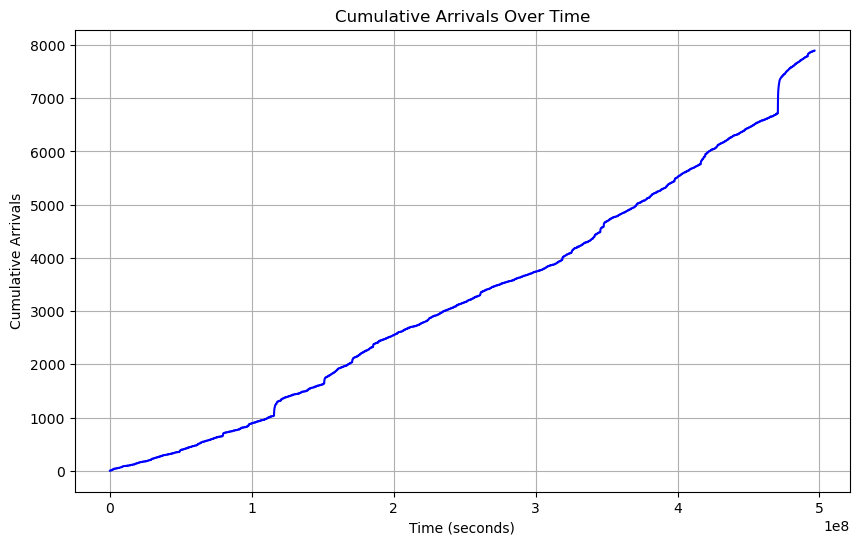

In [270]:

# Calculate arrival times from time differences
arrival_times = time_diff_data.cumsum()

# Create cumulative counts
arrivals = np.arange(0, len(arrival_times) + 1)

# Add point at t=0
arrival_times = np.append([0], arrival_times)

# Create the plot
plt.figure(figsize=(10, 6))
plt.step(arrival_times, arrivals, 'b', where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Arrivals')
plt.title('Cumulative Arrivals Over Time')
plt.grid(True)
plt.show()


First moment: 455143.7503990825, Second moment: 623825172237.1119
Normal distribution: 455143.7503990825, 416669338709.76965
Exponential distribution: 2.1971080545941202e-06
Gamma distribution: 0.49717081215720643, 1.0923379958996987e-06
Uniform distribution: a=18.874, b=5295814.61


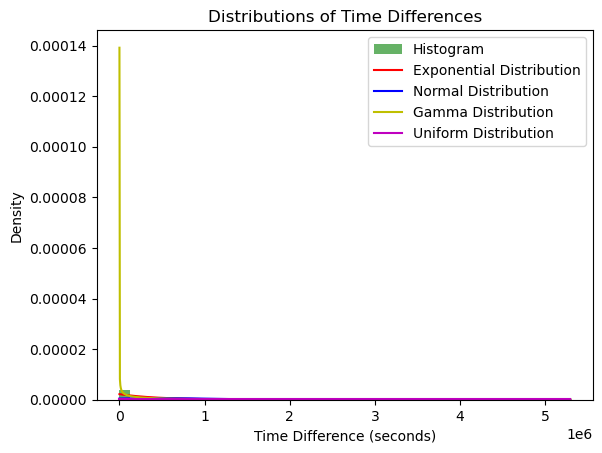

KS Test Exponential distribution: KstestResult(statistic=0.2480866573976562, pvalue=1.3978656045075978e-59, statistic_location=55243.29, statistic_sign=1)
KS Test Normal distribution: KstestResult(statistic=0.24038204128881996, pvalue=6.447810599127756e-56, statistic_location=18.874, statistic_sign=-1)
KS Test Gamma distribution: KstestResult(statistic=0.1082920720653216, pvalue=1.3800135048188761e-11, statistic_location=12698.48, statistic_sign=1)
KS Test Uniform distribution: KstestResult(statistic=0.6655289903335239, pvalue=0.0, statistic_location=1261163.56, statistic_sign=1)


In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert the time differences to seconds
high_mag_data_Q3['time_diff_seconds'] = pd.to_timedelta(high_mag_data_Q3['timediff']).dt.total_seconds()

# Take only relevant column
time_diff_data = high_mag_data_Q3['time_diff_seconds']

# Fitting distributions
# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()

# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)
test_uniform = stats.kstest(time_diff_data, estUniformDist.cdf)

print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))
print('KS Test Uniform distribution: ' + str(test_uniform))


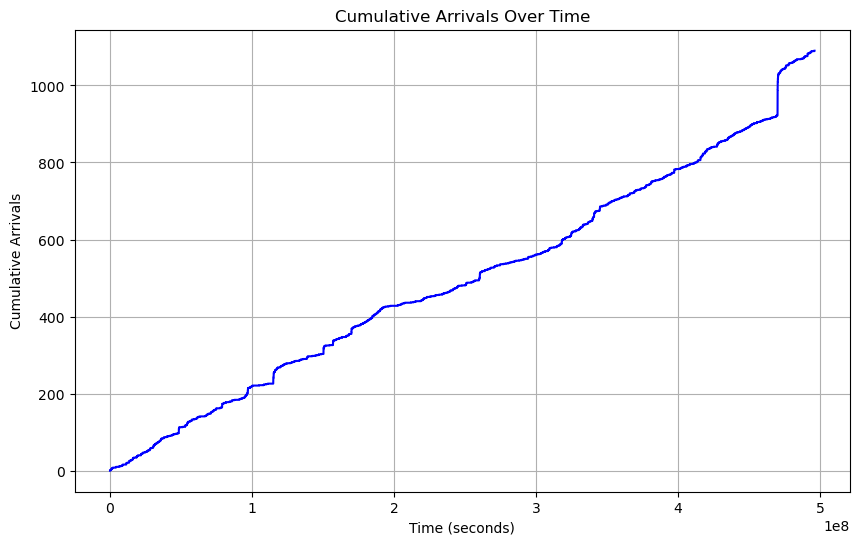

In [274]:

# Calculate arrival times from time differences
arrival_times = time_diff_data.cumsum()

# Create cumulative counts
arrivals = np.arange(0, len(arrival_times) + 1)

# Add point at t=0
arrival_times = np.append([0], arrival_times)

# Create the plot
plt.figure(figsize=(10, 6))
plt.step(arrival_times, arrivals, 'b', where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Arrivals')
plt.title('Cumulative Arrivals Over Time')
plt.grid(True)
plt.show()


In [275]:
low_mag_data_Q3['timediff']

1      0 days 16:39:48.280000
2      1 days 11:36:26.980000
3      0 days 09:26:21.850000
4      1 days 06:04:09.370000
5      2 days 13:08:51.410000
                ...          
9109   0 days 07:56:15.141000
9110   4 days 19:21:43.949000
9111   0 days 00:51:14.730000
9112   1 days 15:18:24.332000
9113   2 days 23:46:32.672000
Name: timediff, Length: 7892, dtype: timedelta64[ns]

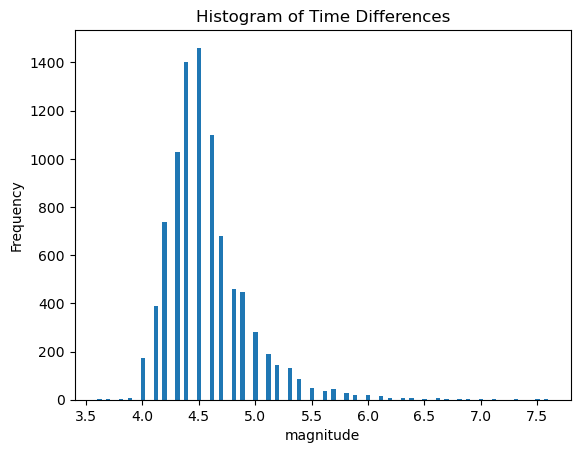

probability that random earthquake has magnitude less than 5 is equal to = 0.8785618878005342


In [276]:
plt.hist(data['mag']
, bins='auto')
plt.title('Histogram of Time Differences')
plt.xlabel('magnitude')
plt.ylabel('Frequency')
plt.show()
prob = len(data[data['mag']<5])/len(data)

print(f'probability that random earthquake has magnitude less than 5 is equal to = {prob}')

In [277]:

#len(data[data['mag']<5]), len(data)-len(data[data['mag']<5])
